### Day 3: Fundamentals of Derivatives for Optimization

#### Objective

Learn the basics of derivatives and understand their role in optimization. In optimization, derivatives (or gradients, in the multivariable case) provide the direction and rate of change of a function, which helps algorithms decide which direction to move to minimize (or maximize) the function.

In [43]:
import numpy as np

In [44]:
# Define the function to minimize
def g(x):
    return np.cos(x) + (x-2) ** 2

In [45]:
# Define the numerical derivative using the central difference

def numerical_derivative(func, x, h=1e-5):
    return (func(x + h) - func(x - h))/(2 * h)

In [46]:
# Implement the gradient descent algorithm

def gradient_descent(func, initial_x, alpha = 0.4, max_iter = 1000, threshold = 1e-6):
    x = initial_x
    current_iter = 0
    while current_iter < max_iter:
        gradient = numerical_derivative(g, x)
        new_x = x - gradient * alpha
        if abs(x - new_x) < threshold:
            break
        x = new_x
        current_iter += 1
    return x, current_iter

In [47]:
optimal_x, iterations = gradient_descent(g, 0)

print("Optimal x:", optimal_x)
print("Minimum g(x):", g(optimal_x))
print("Iterations:", iterations)

Optimal x: 2.3542428808076554
Minimum g(x): -0.5802374206231469
Iterations: 7


Optimal x: 2.3542428808076554
Minimum f(x): -0.5802374206231469
Iterations: 7


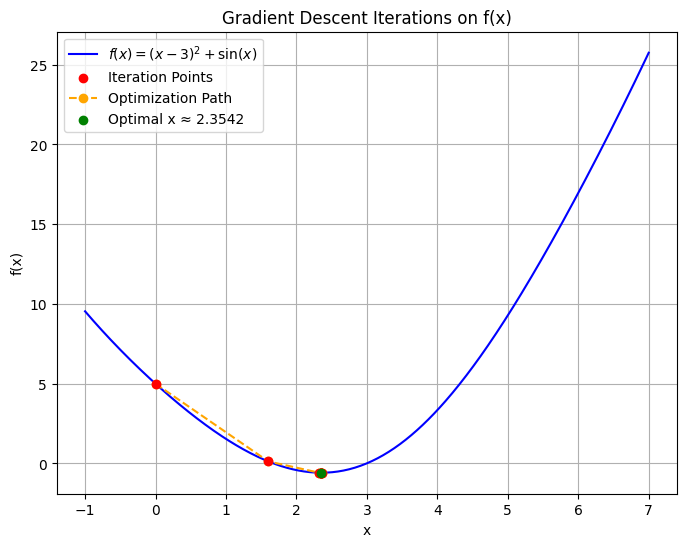

In [54]:
# Visualize the 

import numpy as np
import matplotlib.pyplot as plt

# Define the function to minimize
def f(x):
    return np.cos(x) + (x-2) ** 2

# Numerical derivative using central difference method
def numerical_derivative(func, x, h=1e-5):
    return (func(x + h) - func(x - h)) / (2 * h)

# Gradient descent implementation with iteration history
def gradient_descent(func, initial_x, alpha=0.4, tol=1e-6, max_iter=1000):
    x = initial_x
    iter_count = 0
    # Lists to store the iteration history
    history_x = [x]
    history_y = [func(x)]
    
    while iter_count < max_iter:
        grad = numerical_derivative(func, x)
        x_new = x - alpha * grad
        # Check for convergence based on the change in x
        if abs(x_new - x) < tol:
            break
        x = x_new
        iter_count += 1
        history_x.append(x)
        history_y.append(func(x))
    
    return x, iter_count, history_x, history_y

# Run gradient descent starting from x0 = 0
optimal_x, iterations, history_x, history_y = gradient_descent(f, initial_x=0)
optimal_y = f(optimal_x)

print("Optimal x:", optimal_x)
print("Minimum f(x):", optimal_y)
print("Iterations:", iterations)

# Visualization using matplotlib
# Create a range of x values for plotting the function curve
x_vals = np.linspace(-1, 7, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
# Plot the function curve
plt.plot(x_vals, y_vals, label=r"$f(x) = (x-3)^2 + \sin(x)$", color='blue')
# Plot the iteration points
plt.scatter(history_x, history_y, color='red', zorder=5, label="Iteration Points")
# Connect the iteration points to show the optimization path
plt.plot(history_x, history_y, color='orange', linestyle='--', marker='o', label="Optimization Path")
# Highlight the optimal point
plt.scatter([optimal_x], [optimal_y], color='green', zorder=6, label=f"Optimal x ≈ {optimal_x:.4f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Iterations on f(x)")
plt.legend()
plt.grid(True)
plt.show()